In [ ]:
import pandas as pd
import numpy as np
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

DataPath = "/content/drive/My Drive/Digital breakthrough/run/"
name = "codes_reference.csv"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWimzaeIM75tyDTO42e3Cy6Olkms1bu5VgUS5xnrj9agIOdLKBek4x4


In [ ]:
additional = pd.read_csv(DataPath+name,sep=r",")
additional.to_numpy()
name1 = "dataset_public.json"
with open(DataPath+name1) as train_file:
    dict_train = json.load(train_file)
listDS = list()
for item_train in dict_train:
    dataset = pd.DataFrame(columns=['id','published_at','type_id','language_id','slugline','headline','subheadline','trashline','dateline','body','background','codes'])
    for item in item_train['news']:
        dataset = dataset.append(pd.json_normalize(item),ignore_index=True)
    listDS.append([item_train['title'], dataset])
newDict = list()
for i in range(0,len(listDS)):
    listsDF = listDS[i][1]
    for j in range(0,len(listsDF)):
        listOfCodes = list()
        for k in range(0,(len(listsDF['codes']))):
            for z in range(0,len(additional)):
                if (additional.values[z,0] == listsDF['codes'][k]):
                    listOfCodes.append(additional.values[z,1])
        listsDF.values[j][11]=listOfCodes
    newDict.append([listDS[i][0], listsDF])
listDS = newDict

In [ ]:
len(listDS)

200

In [ ]:
listsOfText = list()
for i in range(0,len(listDS)):
    listsDF = listDS[i][1]
    listsOfText.append('')
    for j in range(0,len(listsDF)):
        listsOfText[i] += listsDF.values[j][9]

In [ ]:
len(listsOfText)

200

# Создание листов по сюжетам

In [ ]:
titledListsOfTexts = list()
listsOfText = list()
for i in range(0,len(listDS)):
    listsDF = listDS[i][1]
    titledListsOfTexts.append([listDS[i][0],list()])
    for j in range(0,len(listsDF)):
        titledListsOfTexts[i][1].append('')
        titledListsOfTexts[i][1][j] += listsDF.values[j][9]

In [ ]:
titledListsOfTexts[0][0]

NameError: ignored

In [ ]:
titledListsOfTexts[0][1]

['Москва. 29 марта. ИНТЕРФАКС - Хроническим больным, в том числе с онкологией, после инфаркта и с высоким давлением можно прививаться от коронавируса COVID-19, в частности, вакциной "ЭпиВакКороной", если заболевание находится не в активной форме, сообщил вирусолог, иммунолог, руководитель екатеринбургского НИИ вирусных инфекций "Вектор" Роспотребнадзора Александр Семенов.\n"Безусловно. Если сейчас процесс у вас не активный, если вы в состоянии ремиссии, вне острого процесса, то не просто можно - нужно, потому что любая инфекция - она только ослабит ваш организм, и даст раку шансы на развитие", - сказал Семенов в эфире "Эхо Москвы" в понедельник, отвечая на соответствующий вопрос.\nАналогично он ответил на вопрос, можно ли делать прививку в возрасте за 60 лет после двух перенесенных инфарктов. "Если у человека сейчас все в порядке - давление под контролем, общие показатели нормальные, опять-таки - вне острого процесса, (...) если вы уже реабилитировались после инфаркта, то - пожалуйста,

In [ ]:
import numpy as np # библиотека для обработки чисел и массиво
import re # библиотека для применения регулярных выражений
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt # библиотека для отрисовки 
from wordcloud import WordCloud # библиотека для формирования "Облака слов"

import nltk # библиотека для NLP
nltk.download('stopwords') # загрузка стоп-слов
from nltk.corpus import stopwords # импорт всех стоп-слов
stop_words = stopwords.words("russian") # получение стоп-слов русского языка

from nltk.stem.snowball import RussianStemmer # библиотека для стемминга
Stemmer_rus = RussianStemmer() # получение стеммера русского языка

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
vectorizer = CountVectorizer(min_df=1, token_pattern = r"(?u)\b\w+\b") # преобразование набора документов в матрицу ДТ
# по умолчанию token_pattern = r”(?u)\b\w\w+\b”. Слова из одного символа будут пропущены 
tdm = vectorizer.fit_transform(listsOfText) # настройка и получение матрицы «документ-терм»

In [ ]:
tdm # информация о ДТМ (размерность и количество хранимых элементов)

<200x55190 sparse matrix of type '<class 'numpy.int64'>'
	with 141292 stored elements in Compressed Sparse Row format>

In [ ]:
print(len(vectorizer.get_feature_names())) # кол-во термов в ДТМ
print(vectorizer.get_feature_names()) # полный список термов

55190
['0', '00', '000', '0000', '00004', '0001', '0004', '0006', '001', '0010', '0011', '0014', '0015', '0016', '0019', '001p', '001б', '001р', '002', '0021', '0022', '0023', '0024', '0025', '0026', '002p', '002р', '003', '0030', '0031', '0033', '0034', '0037', '0038', '0039', '003p', '003р', '004', '0040', '0041', '0042', '00429', '00429в', '0043', '0044', '0045', '0046', '0047', '0048', '00487', '004р', '005', '0050', '0051', '0053', '0056', '006', '0061', '0064', '0067', '0068', '0069', '007', '0076', '008', '0087', '009', '0091', '0092', '0094', '0095', '0097', '0098', '0099', '01', '01000', '01000в', '0102', '0107', '0109', '011', '0111', '0112', '0113', '0114', '0115', '0116', '012', '0123', '013', '0136', '014', '0142', '0143', '0144', '0145', '0146', '0147', '0148', '0149', '015', '0151', '0152', '0153', '0154', '0155', '0156', '0158', '0159', '016', '0166', '017', '018', '019', '0190', '0192', '0195', '01r', '01р', '02', '020', '0201', '021', '0211', '0213', '022', '02209', '

In [ ]:
text_join = ' '.join(listsOfText) # объединение текстов в один текст
words = text_join.split() # разделение текста на слова
freq_word = dict(zip(vectorizer.get_feature_names(), tdm.toarray().sum(axis=0))) # получение частоты слов

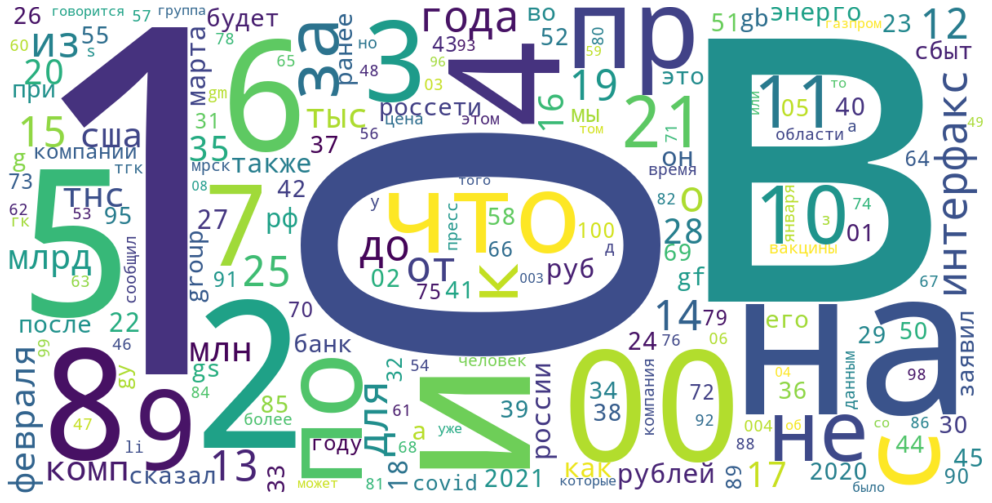

In [ ]:
wc = WordCloud(margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None,
               max_words=200, min_font_size=4, stopwords=None, random_state=None,max_font_size=None,
               font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True,
               colormap=None, normalize_plurals=True, contour_width=0, contour_color='black',
               background_color="white", repeat=True, width=1200, height=600)
wc.generate_from_frequencies(freq_word) # генерация "облака слов" на основе частот

plt.figure(figsize=(18,9))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
corpus = map(lambda text: text.lower(), listsOfText) # перевод текста в нижний регистр символов
corpus = map(lambda text: re.sub(r'[^а-яёa-z ]+', '', text), corpus) # оставить только руссике, английские буквы и пробелы
corpus = map(lambda text: re.sub(r' {2,}', ' ', text), corpus) # удаление лишних пробельных символов
stop_words_new = stop_words + ['это', 'ред', 'риа'] # добавляем свои стоп-слова в список
corpus = map(lambda text: text.split(), corpus) # преобразование каждого текста в список слов
corpus = map(lambda words: list(filter(lambda word: word not in stop_words_new, # удаление стоп-слов русского языка
                                       words)),
            corpus)
corpus = map(lambda text: ' '.join(text), corpus) # преобразование каждого списка слов в текст
corpus = list(corpus) # преобразование итерируемого объекта в список

In [ ]:
corpus[0]

'москва марта интерфакс хроническим больным числе онкологией инфаркта высоким давлением прививаться коронавируса covid частности вакциной эпиваккороной заболевание находится активной форме сообщил вирусолог иммунолог руководитель екатеринбургского нии вирусных инфекций вектор роспотребнадзора александр семеновбезусловно процесс активный состоянии ремиссии вне острого процесса просто нужно любая инфекция ослабит ваш организм даст раку шансы развитие сказал семенов эфире эхо москвы понедельник отвечая соответствующий вопросаналогично ответил вопрос делать прививку возрасте лет двух перенесенных инфарктов человека порядке давление контролем общие показатели нормальные опятьтаки вне острого процесса реабилитировались инфаркта пожалуйста прививайтесь страшного вами случится максимум небольшое повышение температуры течение одного дня которое легко купируется сказал семеновв целом словам хроническое заболевание находится острой форме противопоказаний против вакцинации неткакое заболевание нап

In [ ]:
vectorizer = CountVectorizer(min_df=1, token_pattern = r"(?u)\b\w+\b") # преобразование набора документов в ДТМ
# по умолчанию token_pattern = r”(?u)\b\w\w+\b”. Слова из одного символа будут пропущены 
tdm = vectorizer.fit_transform(corpus) # настройка и получение матрицы «документ-терм»

In [ ]:
tdm # информация о ДТМ (размерность и количество хранимых элементов)

<200x32262 sparse matrix of type '<class 'numpy.int64'>'
	with 86345 stored elements in Compressed Sparse Row format>

In [ ]:
print(len(vectorizer.get_feature_names())) # кол-во термов в ДТМ
print(vectorizer.get_feature_names()) # полный список термов

32262
['a', 'abc', 'abcна', 'abcсогласно', 'absgb', 'access', 'accordance', 'across', 'activision', 'activist', 'adiz', 'adp', 'ads', 'advise', 'adx', 'aeon', 'aerolineas', 'aex', 'aflt', 'ag', 'agroggb', 'agroglitcs', 'agrotcs', 'aifa', 'air', 'airbus', 'airlines', 'airlinesаэропорт', 'aix', 'alexei', 'all', 'allegro', 'alliance', 'amazon', 'amazonia', 'amdm', 'america', 'amex', 'amапр', 'amмай', 'amмар', 'amфев', 'amфевamмар', 'and', 'andina', 'aneo', 'anhui', 'announcement', 'anysemicron', 'ap', 'apcovax', 'api', 'apple', 'appstore', 'apt', 'apв', 'apсогласно', 'archegos', 'are', 'argentinas', 'ariana', 'arianespace', 'armenia', 'arrested', 'arts', 'as', 'ase', 'asia', 'asset', 'associated', 'astra', 'astrazeneca', 'astrazenecaema', 'astrazenecaв', 'astrazenecaво', 'astrazenecaгк', 'astrazenecaкак', 'astrazenecaпо', 'astrazenecaпосле', 'astrazenecaпри', 'astrazenecaса', 'astrazenecaсогласно', 'astrazenecaяпонское', 'astrazeneсa', 'astrazenеca', 'attacks', 'auduмарauduиюн', 'australi

In [ ]:
text_join = ' '.join(corpus) # объединение текстов в один текст
words = text_join.split() # разделение текста на слова
freq_word = dict(zip(vectorizer.get_feature_names(), tdm.toarray().sum(axis=0))) # получение частоты слов

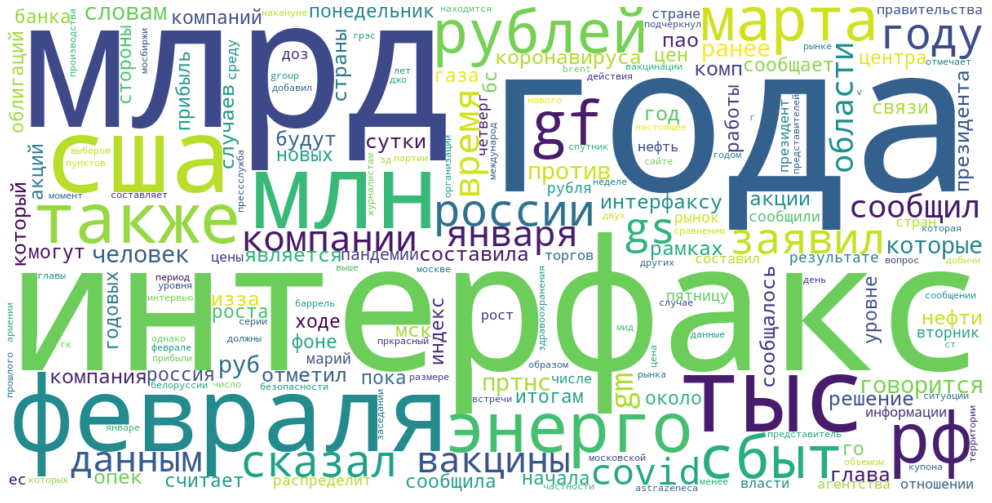

In [ ]:
wc = WordCloud(margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None,
               max_words=200, min_font_size=4, stopwords=None, random_state=None,max_font_size=None,
               font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True,
               colormap=None, normalize_plurals=True, contour_width=0, contour_color='black',
               background_color="white", repeat=True, width=1200, height=600)
wc.generate_from_frequencies(freq_word) # генерация "облака слов" на основе частот

plt.figure(figsize=(18,9))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
corpus = map(lambda text: text.lower(), listsOfText) # перевод текста в нижний регистр символов
corpus = map(lambda text: re.sub(r'[^а-яёa-z ]+', '', text), corpus) # оставить только руссике, английские буквы и пробелы
corpus = map(lambda text: re.sub(r' {2,}', ' ', text), corpus) # удаление лишних пробельных символов
stop_words_new = stop_words + ['эт', 'ред', 'риа', 'котор', 'ег'] # добавляем свои стоп-слова в список
corpus = map(lambda text: text.split(), corpus) # преобразование каждого текста в список слов
corpus = map(lambda words: list(filter(lambda word: word not in stop_words_new, # удаление стоп-слов русского языка
words)), corpus)
corpus = map(lambda words: list(map(lambda word: Stemmer_rus.stem(word), # стемминг текста - преобразование слов в их основы
words)),corpus)
corpus = map(lambda words: list(filter(lambda word: word not in stop_words_new, # удаление стоп-слов русского языка
words)),corpus)
corpus = map(lambda text: ' '.join(text), corpus) # преобразование каждого списка слов в текст
corpus = list(corpus) # преобразование итерируемого объекта в список

In [ ]:
vectorizer = CountVectorizer(min_df=1, token_pattern = r"(?u)\b\w+\b") # преобразование набора документов в ДТМ
# по умолчанию token_pattern = r”(?u)\b\w\w+\b”. Слова из одного символа будут пропущены 
tdm = vectorizer.fit_transform(corpus) # настройка и получение матрицы «документ-терм»

In [ ]:
tdm # информация о ДТМ (размерность и количество хранимых элементов)

<200x18100 sparse matrix of type '<class 'numpy.int64'>'
	with 68329 stored elements in Compressed Sparse Row format>

In [ ]:
print(len(vectorizer.get_feature_names())) # кол-во термов в ДТМ
print(vectorizer.get_feature_names()) # полный список термов

18100
['a', 'abc', 'absgb', 'access', 'accordanc', 'across', 'activision', 'activist', 'adiz', 'adp', 'ads', 'advis', 'adx', 'aeon', 'aerolineas', 'aex', 'aflt', 'ag', 'agroggb', 'agroglitcs', 'agrotcs', 'aif', 'air', 'airbus', 'airlines', 'aix', 'alex', 'all', 'allegr', 'allianc', 'amazon', 'amdm', 'americ', 'amex', 'and', 'andin', 'ane', 'anhu', 'announcement', 'anysemicron', 'ap', 'apcovax', 'appl', 'appstor', 'apt', 'ar', 'archegos', 'argentinas', 'aria', 'arianespac', 'armen', 'arrested', 'arts', 'as', 'asset', 'associated', 'astr', 'astrazenec', 'astrazenecaem', 'attacks', 'austral', 'authorit', 'averag', 'avgsp', 'awacs', 'ax', 'axp', 'azd', 'azur', 'b', 'baker', 'bangkok', 'bank', 'banking', 'barrons', 'bbb', 'bbp', 'bcs', 'bdp', 'be', 'bear', 'bearf', 'beast', 'becar', 'begin', 'below', 'bi', 'billion', 'biocubafarm', 'biologics', 'biontech', 'biontechpfizer', 'biopharm', 'biopharmaceutica', 'biosanof', 'biotech', 'bis', 'black', 'blizzard', 'blizzardadvanced', 'bloomberg', 'b

In [ ]:
text_join = ' '.join(corpus) # объединение текстов в один текст
words = text_join.split() # разделение текста на слова
freq_word = dict(zip(vectorizer.get_feature_names(), tdm.toarray().sum(axis=0))) # получение частоты слов

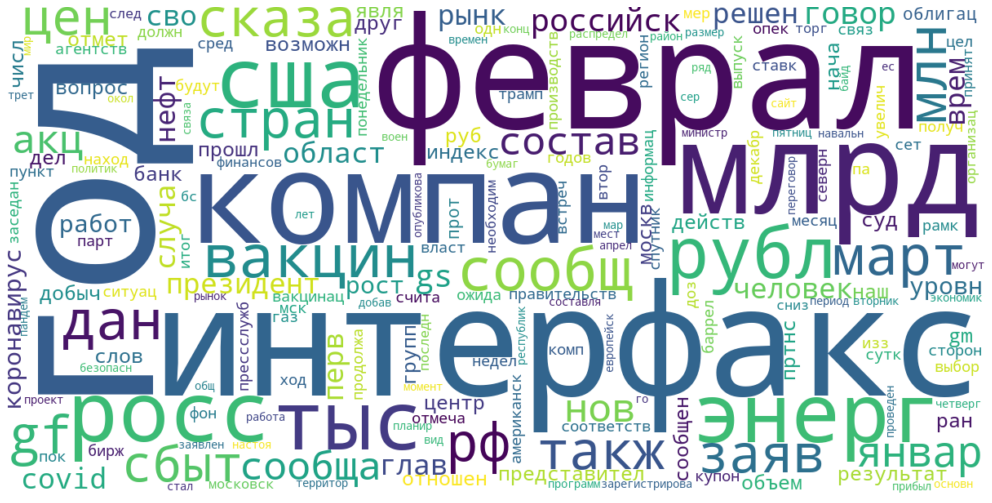

In [ ]:
wc = WordCloud(margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None,
               max_words=200, min_font_size=4, stopwords=None, random_state=None,max_font_size=None,
               font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True,
               colormap=None, normalize_plurals=True, contour_width=0, contour_color='black',
               background_color="white", repeat=True, width=1200, height=600)
wc.generate_from_frequencies(freq_word) # генерация "облака слов" на основе частот

plt.figure(figsize=(18,9))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [ ]:
%pip install natasha

     |████████████████████████████████| 34.4 MB 28 kB/s 
     |████████████████████████████████| 41 kB 103 kB/s 
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 49 kB 4.2 MB/s 
     |████████████████████████████████| 8.2 MB 11.5 MB/s 
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26119 sha256=70f8de24abaefa9edfa5d9159250b87839ebfeee88f8d1417371503b8dbf3e3c
  Stored in directory: /root/.cache/pip/wheels/16/85/bd/1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
Successfully built intervaltree
  Attempting uninstall: intervaltree
    Found existing installation: intervaltree 2.1.0
    Uninstalling intervaltree-2.1.0:
      Successfully uninstalled intervaltree-2.1.0


In [ ]:
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    PER,
    NamesExtractor,
    Doc
)

In [ ]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

doc = Doc(listsOfText[0])

# Сегментация

In [ ]:
doc.segment(segmenter)
doc.tokens[:10]
doc.sents[:10]

[DocSent(stop=7, text='Москва.', tokens=[...]),
 DocSent(start=8, stop=17, text='29 марта.', tokens=[...]),
 DocSent(start=18, stop=372, text='ИНТЕРФАКС - Хроническим больным, в том числе с он..., tokens=[...]),
 DocSent(start=373, stop=385, text='"Безусловно.', tokens=[...]),
 DocSent(start=386, stop=685, text='Если сейчас процесс у вас не активный, если вы в ..., tokens=[...]),
 DocSent(start=686, stop=799, text='Аналогично он ответил на вопрос, можно ли делать ..., tokens=[...]),
 DocSent(start=800, stop=1174, text='"Если у человека сейчас все в порядке - давление ..., tokens=[...]),
 DocSent(start=1175, stop=1299, text='В целом, по его словам, если хроническое заболева..., tokens=[...]),
 DocSent(start=1300, stop=1468, text='"Какое бы заболевание ни было, например, диабет, ..., tokens=[...]),
 DocSent(start=1469, stop=1577, text='Особенно пептидными вакцинами ("ЭпиВакКорона" отн..., tokens=[...])]

# Морфология

In [ ]:
doc.tag_morph(morph_tagger)
doc.tokens[:5]
doc.sents[2].morph.print()

           ИНТЕРФАКС PROPN|Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing
                   - PUNCT
         Хроническим ADJ|Case=Ins|Degree=Pos|Gender=Masc|Number=Sing
             больным NOUN|Animacy=Anim|Case=Ins|Gender=Masc|Number=Sing
                   , PUNCT
                   в ADP
                 том DET|Case=Loc|Gender=Neut|Number=Sing
               числе NOUN|Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing
                   с ADP
          онкологией NOUN|Animacy=Inan|Case=Ins|Gender=Masc|Number=Sing
                   , PUNCT
               после ADP
            инфаркта NOUN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing
                   и CCONJ
                   с ADP
             высоким ADJ|Case=Ins|Degree=Pos|Gender=Neut|Number=Sing
           давлением NOUN|Animacy=Inan|Case=Ins|Gender=Neut|Number=Sing
               можно ADV|Degree=Pos
         прививаться VERB|Aspect=Imp|VerbForm=Inf|Voice=Mid
                  от ADP
        коронавируса NOUN|Animacy=Inan|Cas

# Лемитизация


In [ ]:
for token in doc.tokens:
    token.lemmatize(morph_vocab)
doc.tokens[:5]

[DocToken(stop=6, text='Москва', pos='PROPN', feats=<Inan,Nom,Fem,Sing>, lemma='москва'),
 DocToken(start=6, stop=7, text='.', pos='PUNCT', lemma='.'),
 DocToken(start=8, stop=10, text='29', pos='ADJ', lemma='29'),
 DocToken(start=11, stop=16, text='марта', pos='NOUN', feats=<Inan,Gen,Masc,Sing>, lemma='март'),
 DocToken(start=16, stop=17, text='.', pos='PUNCT', lemma='.')]

In [ ]:
doc.parse_syntax(syntax_parser)
doc.tokens[:5]
doc.sents[2].syntax.print()

        ┌────────────────► ИНТЕРФАКС         nsubj
        │             ┌──► -                 punct
        │             │ ┌► Хроническим       amod
        │     ┌───────└─└─ больным           
        │     │   ┌──────► ,                 punct
        │     │   │   ┌──► в                 case
        │     │   │   │ ┌► том               det
        │     │   │ ┌►└─└─ числе             nmod
        │     │   │ │   ┌► с                 case
        │ ┌──►│ ┌─└─└───└─ онкологией        nmod
        │ │   │ │     ┌──► ,                 punct
        │ │   │ │     │ ┌► после             case
  ┌─────│ │ ┌─└►│     └─└─ инфаркта          conj
  │ ┌──►│ │ │   │          и                 cc
  │ │   │ │ │   │     ┌──► с                 case
  │ │   │ │ │   │     │ ┌► высоким           amod
  │ │   │ │ │   └────►└─└─ давлением         conj
┌─│ │ ┌─└─│ │           ┌─ можно             
│ │ │ │ │ │ │         ┌─└► прививаться       csubj
│ │ │ │ │ │ │         │ ┌► от                case
│ │ │ 

In [ ]:
doc.tag_ner(ner_tagger)
doc.spans[:5]
doc.ner.print()

Москва. 29 марта. ИНТЕРФАКС - Хроническим больным, в том числе с 
LOC───            ORG──────                                      
онкологией, после инфаркта и с высоким давлением можно прививаться от 
коронавируса COVID-19, в частности, вакциной "ЭпиВакКороной", если 
заболевание находится не в активной форме, сообщил вирусолог, 
иммунолог, руководитель екатеринбургского НИИ вирусных инфекций 
                                          ORG───────────────────
"Вектор" Роспотребнадзора Александр Семенов.
──────── ORG───────────── PER────────────── 
"Безусловно. Если сейчас процесс у вас не активный, если вы в 
состоянии ремиссии, вне острого процесса, то не просто можно - нужно, 
потому что любая инфекция - она только ослабит ваш организм, и даст 
раку шансы на развитие", - сказал Семенов в эфире "Эхо Москвы" в 
                                  PER────          ORG───────    
понедельник, отвечая на соответствующий вопрос.
Аналогично он ответил на вопрос, можно ли делать прививку в воз

In [ ]:
for span in doc.spans:
   span.normalize(morph_vocab)
doc.spans[:5]
{_.text: _.normal for _ in doc.spans if _.text != _.normal}

{'Екатеринбургского НИИ вирусных инфекций "Вектор"': 'Екатеринбургский НИИ вирусных инфекций "Вектор"',
 'Национального исследовательского центра эпидемиологии и микробиологии им. Н.Ф. Гамалеи': 'Национального исследовательского центра эпидемиологии и микробиологии имя. Н.Ф. Гамалеи',
 'Роспотребнадзора': 'Роспотребнадзор',
 'Чумакова РАН': 'Чумаков РАН'}

In [ ]:
for span in doc.spans:
   if span.type == PER:
       span.extract_fact(names_extractor)

doc.spans[:5]
{_.normal: _.fact.as_dict for _ in doc.spans if _.type == PER}

NameError: ignored

# Моя предобработка

In [ ]:
import re
from nltk.corpus import stopwords # импорт всех стоп-слов
import nltk 
nltk.download('stopwords')
stop_words = stopwords.words("russian") # получение стоп-слов русского языка
corpus = map(lambda text: re.sub(r'[^а-яёa-zА-ЯЁ ]+', ' ', text), listsOfText) # оставить только руссике, английские буквы и пробелы
corpus = map(lambda text: re.sub(r' {2,}', ' ', text), corpus) # удаление лишних пробельных символов
stop_words_new = stop_words + ['это', 'ИНТЕРФАКС', 'млрд', 'тыс', 'руб', 'млн', 'в','сг','ки'] # добавляем свои стоп-слова в список
corpus = map(lambda text: text.split(), corpus) # преобразование каждого текста в список слов
corpus = map(lambda words: list(filter(lambda word: word not in stop_words_new, words)), corpus) # удаление стоп-слов русского языка
corpus = map(lambda text: ' '.join(text), corpus) # преобразование каждого списка слов в текст
corpus = list(corpus) # преобразование итерируемого объекта в список

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
listsOfText[0]

'Москва. 29 марта. ИНТЕРФАКС - Хроническим больным, в том числе с онкологией, после инфаркта и с высоким давлением можно прививаться от коронавируса COVID-19, в частности, вакциной "ЭпиВакКороной", если заболевание находится не в активной форме, сообщил вирусолог, иммунолог, руководитель екатеринбургского НИИ вирусных инфекций "Вектор" Роспотребнадзора Александр Семенов.\n"Безусловно. Если сейчас процесс у вас не активный, если вы в состоянии ремиссии, вне острого процесса, то не просто можно - нужно, потому что любая инфекция - она только ослабит ваш организм, и даст раку шансы на развитие", - сказал Семенов в эфире "Эхо Москвы" в понедельник, отвечая на соответствующий вопрос.\nАналогично он ответил на вопрос, можно ли делать прививку в возрасте за 60 лет после двух перенесенных инфарктов. "Если у человека сейчас все в порядке - давление под контролем, общие показатели нормальные, опять-таки - вне острого процесса, (...) если вы уже реабилитировались после инфаркта, то - пожалуйста, 

In [ ]:
corpus[0]

'Москва марта Хроническим больным числе онкологией инфаркта высоким давлением прививаться коронавируса частности вакциной ЭпиВакКороной заболевание находится активной форме сообщил вирусолог иммунолог руководитель екатеринбургского НИИ вирусных инфекций Вектор Роспотребнадзора Александр Семенов Безусловно Если процесс активный состоянии ремиссии вне острого процесса просто нужно любая инфекция ослабит ваш организм даст раку шансы развитие сказал Семенов эфире Эхо Москвы понедельник отвечая соответствующий вопрос Аналогично ответил вопрос делать прививку возрасте лет двух перенесенных инфарктов Если человека порядке давление контролем общие показатели нормальные таки вне острого процесса реабилитировались инфаркта пожалуйста прививайтесь страшного вами случится максимум небольшое повышение температуры течение одного дня которое легко купируется сказал Семенов В целом словам хроническое заболевание находится острой форме противопоказаний против вакцинации Какое заболевание например диабе

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # импорт класса для расчёта метрики TF-IDF
vectorizer = TfidfVectorizer(token_pattern = r"(?u)\b\w+\b") # преобразование набора документов в TF-IDF матрицу
# по умолчанию token_pattern = r”(?u)\b\w\w+\b”. Слова из одного символа будут пропущены 
tf_idf_matrix = vectorizer.fit_transform(corpus) # настройка и получение матрицы TF-IDF

In [ ]:
tf_idf_matrix # информация о матрице TF-IDF (размерность и количество хранимых элементов)

<200x26308 sparse matrix of type '<class 'numpy.float64'>'
	with 84543 stored elements in Compressed Sparse Row format>

In [ ]:
print(len(vectorizer.get_feature_names())) # кол-во термов в ТДМ
print(vectorizer.get_feature_names()) # полный список термов

26308
['a', 'ac', 'access', 'accine', 'accordance', 'acebook', 'achs', 'ackenzie', 'acks', 'across', 'act', 'activist', 'adogan', 'adrid', 'advise', 'aersk', 'agnum', 'aidu', 'aiichi', 'ail', 'aily', 'air', 'aixin', 'akarta', 'aker', 'alcon', 'all', 'alliance', 'almart', 'alph', 'alt', 'am', 'amilies', 'amonico', 'an', 'anagement', 'ance', 'ancet', 'and', 'anda', 'anden', 'andrij', 'ang', 'angkok', 'anguard', 'ank', 'anking', 'ankyo', 'anno', 'announcement', 'anofi', 'anssen', 'anuary', 'anufacturing', 'apital', 'ar', 'arathon', 'arcraft', 'ard', 'are', 'argo', 'arine', 'aris', 'ark', 'arket', 'arketing', 'arkets', 'arkit', 'arler', 'arma', 'arper', 'arrested', 'arron', 'ars', 'as', 'asdaq', 'ash', 'ashington', 'aspx', 'ast', 'aster', 'astercard', 'ata', 'atch', 'ate', 'ational', 'attacks', 'auren', 'aval', 'avalny', 'aven', 'ay', 'azda', 'be', 'been', 'begin', 'ber', 'berbank', 'billion', 'blue', 'bonds', 'book', 'building', 'business', 'buyback', 'by', 'c', 'case', 'chips', 'ciences'

In [ ]:
tf_idf_df = pd.DataFrame.sparse.from_spmatrix(tf_idf_matrix) # Преобразование в простую матрицу

In [ ]:
freq = tf_idf_df.sum(axis=0).sort_values(ascending=False) # Расчет частоты слов - суммирование строк матрицы и сортировка

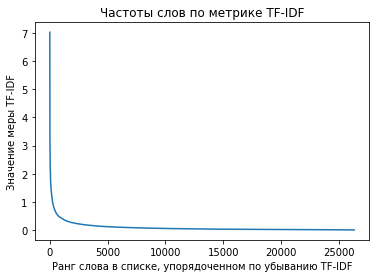

In [ ]:
import matplotlib.pyplot as plt # библиотека для отрисовки 
plt.plot(np.arange(len(freq)), freq)
plt.xlabel('Ранг слова в списке, упорядоченном по убыванию TF-IDF')
plt.ylabel('Значение меры TF-IDF')
plt.title('Частоты слов по метрике TF-IDF')
plt.show()

In [ ]:
most_freq_words = np.array(vectorizer.get_feature_names())[freq.index.tolist()[:20]].tolist() # 10 наиболее часто встречающихся термов
print(most_freq_words)

['в', 'сша', 'рублей', 'года', 'пр', 'февраля', 'вакцины', 'марта', 'рф', 'по', 'человек', 'сутки', 'также', 'данным', 'сказал', 'россии', 'случаев', 'области', 'компании', 'заявил']


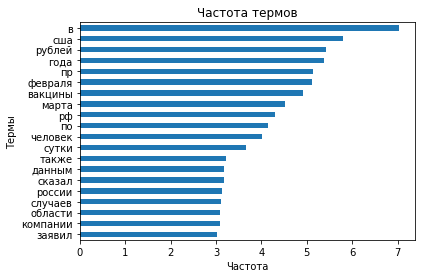

In [ ]:
freq_series = pd.Series(freq[:20].values, index=most_freq_words)
freq_series.sort_values().plot.barh()
plt.title('Частота термов')
plt.ylabel('Термы')
plt.xlabel('Частота')
plt.show()

# Коллокации

In [ ]:
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder, BigramAssocMeasures, TrigramAssocMeasures # импорт классов для извлечения коллокаций
from sklearn.metrics.pairwise import cosine_similarity
documents = list(map(lambda text: text.split(), corpus))
#documents

In [ ]:
bigram_finder = BigramCollocationFinder.from_documents(documents)
bigram_measure = BigramAssocMeasures()
bigram_finder.apply_freq_filter(2)

In [ ]:
colloc_2 = pd.DataFrame([(word1 + ' ' + word2, freq) for (word1, word2), freq in bigram_finder.score_ngrams(bigram_measure.raw_freq)],
                        columns=['Фраза', 'Частота'])
colloc_2.head(10) # вывод биграмм

Фраза   Частота
0           ТНС энерго  0.002967
1            сбыт комп  0.002350
2                  з д  0.001489
3               пр ТНС  0.001382
4            По данным  0.001187
5            По словам  0.000984
6              комп пр  0.000900
7              ТГК ТГК  0.000896
8  говорится сообщении  0.000848
9         АНК Башнефть  0.000701

In [ ]:
trigram_finder = TrigramCollocationFinder.from_documents(documents)
trigram_measure = TrigramAssocMeasures()
trigram_finder.apply_freq_filter(2)

In [ ]:
colloc_3 = pd.DataFrame([(word1 + ' ' + word2 + ' ' + word3, freq) for (word1, word2, word3), freq in trigram_finder.score_ngrams(trigram_measure.raw_freq)],
                        columns=['Фраза', 'Частота'])
colloc_3.head(5) # вывод триграмм

Фраза   Частота
0       пр ТНС энерго  0.001063
1  Оргсинтез г Казань  0.000685
2  ТНС энерго Воронеж  0.000661
3    ТНС энерго Марий  0.000661
4       ТНС энерго НН  0.000661

In [ ]:
pairwise_similarity = cosine_similarity(tf_idf_matrix, tf_idf_matrix) # расчёт сходства по косинусной мере
# Аналогично pairwise_similarity = tf_idf_matrix * tf_idf_matrix.T
pd.DataFrame(pairwise_similarity) # преобразование в таблицу

0         1         2    ...       197       198       199
0    1.000000  0.016455  0.015352  ...  0.030623  0.007944  0.012941
1    0.016455  1.000000  0.013962  ...  0.021605  0.010391  0.014952
2    0.015352  0.013962  1.000000  ...  0.007428  0.007105  0.008815
3    0.000781  0.000543  0.001472  ...  0.001828  0.004765  0.000963
4    0.025548  0.024973  0.027692  ...  0.049132  0.073828  0.019850
..        ...       ...       ...  ...       ...       ...       ...
195  0.002497  0.000497  0.002650  ...  0.001828  0.001595  0.002544
196  0.001966  0.001089  0.002200  ...  0.002525  0.006810  0.005817
197  0.030623  0.021605  0.007428  ...  1.000000  0.028832  0.021165
198  0.007944  0.010391  0.007105  ...  0.028832  1.000000  0.086011
199  0.012941  0.014952  0.008815  ...  0.021165  0.086011  1.000000

[200 rows x 200 columns]

# RuGPT-3

In [ ]:
%pip install torch
%pip install transformers

     |████████████████████████████████| 2.6 MB 4.2 MB/s 
     |████████████████████████████████| 636 kB 42.1 MB/s 
     |████████████████████████████████| 3.3 MB 35.3 MB/s 
     |████████████████████████████████| 895 kB 51.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import transformers 

In [ ]:
np.random.seed(42)
torch.manual_seed(42)

In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tok  = AutoTokenizer.from_pretrained("sberbank-ai/rugpt3small_based_on_gpt2")

model = AutoModelWithLMHead.from_pretrained("sberbank-ai/rugpt3small_based_on_gpt2")

Downloading:   0%|          | 0.00/608 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.71M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:902: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/551M [00:00<?, ?B/s]

In [ ]:
model.cuda()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50264, 768)
    (wpe): Embedding(2048, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )


In [ ]:
text = "Статья: Москва марта Хроническим больным числе онкологией инфаркта высоким давлением прививаться коронавируса частности вакциной ЭпиВакКороной заболевание находится активной форме сообщил вирусолог иммунолог руководитель екатеринбургского НИИ вирусных инфекций Вектор Роспотребнадзора Александр Семенов Безусловно Если процесс активный состоянии ремиссии вне острого процесса просто нужно любая инфекция ослабит ваш организм даст раку шансы развитие сказал Семенов эфире Эхо Москвы понедельник отвечая соответствующий вопрос Аналогично ответил вопрос делать прививку возрасте лет двух перенесенных инфарктов Если человека порядке давление контролем общие показатели нормальные таки вне острого процесса реабилитировались инфаркта пожалуйста прививайтесь страшного вами случится максимум небольшое повышение температуры течение одного дня которое легко купируется сказал Семенов В целом словам хроническое заболевание находится острой форме противопоказаний против вакцинации Какое заболевание например диабет сахар целевых показателях принимаете вовремя лекарства контролируете противопоказаний Особенно пептидными вакцинами ЭпиВакКорона относится ИФ плане наименее реактогенные Если гипертония вовремя принимаете свое гипотензивное средство контролируете свое давление идите прививайтесь страшного сказал Семенов То относится например ДЦП причем никаких противопоказаний прекрасно деточки ДЦП вырабатывают антитела таки проблема неврологическая иммунологическая По словам вакцинация станет сезонной временем вакцину точно подбирать исходя особенностей здоровья человека выбора В условиях эпидемического процесса идет эпидемия рекомендую любую доступную вакцину которая вашей поликлинике фельдшерско акушерском пункте которая способна остановить процесс Мы должны вернуться нормальной жизни сказал Семенов Он подчеркнул вакцины менее одинаков безопасны вакцины менее одинаково дают никаких нежелательных эффектов Семенов отметил сравнению перспективой выражаясь жаргонно склеить ласты коронавируса нежелательные реакции которые могут временно развиться человека вакцинации той иной вакциной всё очень маленькие жертвы Сейчас РФ зарегистрированы отечественные вакцины Спутник Национального исследовательского центра эпидемиологии микробиологии Н Ф Гамалеи министерства здравоохранения РФ ЭпиВакКорона разработанная центром Вектор Роспотребнадзора КовиВак центра Чумакова РАН января РФ началась массовая вакцинация прививают россиян пока основном вакциной бпМосква марта Хроническим больным числе онкологией инфаркта высоким давлением прививаться коронавируса частности вакциной ЭпиВакКороной заболевание находится активной форме сообщил вирусолог иммунолог руководитель екатеринбургского НИИ вирусных инфекций Вектор Роспотребнадзора Александр Семенов Безусловно Если процесс активный состоянии ремиссии вне острого процесса просто нужно любая инфекция ослабит ваш организм даст раку шансы развитие сказал Семенов эфире Эхо Москвы понедельник отвечая соответствующий вопрос Аналогично ответил вопрос делать прививку возрасте лет двух перенесенных инфарктов Если человека порядке давление контролем общие показатели нормальные таки вне острого процесса реабилитировались инфаркта пожалуйста прививайтесь страшного вами случится максимум небольшое повышение температуры течение одного дня которое легко купируется сказал Семенов В целом словам хроническое заболевание находится острой форме противопоказаний против вакцинации Какое заболевание например диабет сахар целевых показателях принимаете вовремя лекарства контролируете противопоказаний Особенно пептидными вакцинами ЭпиВакКорона относится ИФ плане наименее реактогенные Если гипертония вовремя принимаете свое гипотензивное средство контролируете свое давление идите прививайтесь страшного сказал Семенов То относится например ДЦП причем никаких противопоказаний прекрасно деточки ДЦП вырабатывают антитела таки проблема неврологическая иммунологическая По словам вакцинация станет сезонной временем вакцину точно подбирать исходя особенностей здоровья человека выбора В условиях эпидемического процесса идет эпидемия рекомендую любую доступную вакцину которая вашей поликлинике фельдшерско акушерском пункте которая способна остановить процесс Мы должны вернуться нормальной жизни сказал Семенов Он подчеркнул вакцины менее одинаков безопасны вакцины менее одинаково дают никаких нежелательных эффектов Семенов отметил сравнению перспективой выражаясь жаргонно склеить ласты коронавируса нежелательные реакции которые могут временно развиться человека вакцинации той иной вакциной всё очень маленькие жертвы бп Очередная партия вакцины выйдет гражданский оборот начале апреля Москва марта Производство вакцины центра Вектор апреле вырастет доз месяц сообщил глава Екатеринбургского НИИ вирусных инфекций Вектор Роспотребнадзора Александр Семенов Сейчас производится миллион доз месяц вакцины ЭпиВакКороны центра Вектор С ближайшего месяца масштабируется доз месяц сказал Семенов эфире Эхо Москвы понедельник Он уточнил первая партия вакцины которая вышла гражданский оборот полностью распределена конечных потребителей Следующая выходит первую неделю апреля сразу поступать гражданский оборот пояснил Семенов расширено абзаца Москва марта Производство вакцины центра Вектор апреле вырастет доз месяц сообщил глава Екатеринбургского НИИ вирусных инфекций Вектор Роспотребнадзора Александр Семенов Сейчас производится миллион доз месяц вакцины ЭпиВакКороны центра Вектор С ближайшего месяца масштабируется доз месяц сказал Семенов эфире Эхо Москвы понедельник Он уточнил первая партия вакцины которая вышла гражданский оборот полностью распределена конечных потребителей Следующая выходит первую неделю апреля сразу поступать гражданский оборот пояснил Семенов киМосква марта Производство вакцины центра Вектор апреле вырастет доз месяц сообщил глава Екатеринбургского НИИ вирусных инфекций Вектор Роспотребнадзора Александр Семенов Сейчас производится миллион доз месяц вакцины ЭпиВакКороны центра Вектор С ближайшего месяца масштабируется доз месяц сказал Семенов эфире Эхо Москвы понедельник \n Название:"
inpt = tok.encode(text, return_tensors="pt")

In [ ]:
out = model.generate(inpt.cuda(), max_length=200, repetition_penalty=5.0, do_sample=True, top_k=5, top_p=0.9, temperature=1)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 1036, but ``max_length`` is set to 200.This can lead to unexpected behavior. You should consider increasing ``config.max_length`` or ``max_length``.


In [ ]:
print(tok.decode(out[0]))

Статья: Москва марта Хроническим больным числе онкологией инфаркта высоким давлением прививаться коронавируса частности вакциной ЭпиВакКороной заболевание находится активной форме сообщил вирусолог иммунолог руководитель екатеринбургского НИИ вирусных инфекций Вектор Роспотребнадзора Александр Семенов Безусловно Если процесс активный состоянии ремиссии вне острого процесса просто нужно любая инфекция ослабит ваш организм даст раку шансы развитие сказал Семенов эфире Эхо Москвы понедельник отвечая соответствующий вопрос Аналогично ответил вопрос делать прививку возрасте лет двух перенесенных инфарктов Если человека порядке давление контролем общие показатели нормальные таки вне острого процесса реабилитировались инфаркта пожалуйста прививайтесь страшного вами случится максимум небольшое повышение температуры течение одного дня которое легко купируется сказал Семенов В целом словам хроническое заболевание находится острой форме противопоказаний против вакцинации Какое заболевание наприме

In [ ]:
vectorizer.fit_transform(corpus) 

# Интерфейс (веб-сервис)

In [1]:
pip install flask-ngrok

In [90]:
from google.colab import drive
drive.mount('/content/drive/')

import numpy as np
from flask import Flask, request, render_template
from flask_ngrok import run_with_ngrok

app = Flask(__name__, template_folder='/content/drive/My Drive/Digital breakthrough/run/')
run_with_ngrok(app)
@app.route('/')
def home():
    return render_template('index2.html', outputVisible="none")

@app.route('/getprediction',methods=['POST'])
def getprediction():

    input = [str(x) for x in request.form.values()]
    final_input = [np.array(input)]
    #print(input[0])
    myFile = open('/content/drive/My Drive/Digital breakthrough/run/input.json', 'w')
    myFile.write(input[0])
    myFile.close()
    genNames(readFile('input.json'))
    listOutput = []
    for i in range(0,15):
        listOutput.append('')
    #return render_template('index2.html', output='Predicted 1Weight in KGs :{}'.format(prediction))
    return render_template('index2.html',outputVisible="table", output0=listOutput[0],output1=listOutput[1],output2=listOutput[2],output3=listOutput[3],output4=listOutput[4],output5=listOutput[5],output6=listOutput[6],output7=listOutput[7],output8=listOutput[8],output9=listOutput[9],output10=listOutput[10],output11=listOutput[11],output12=listOutput[12],output13=listOutput[13],output14=listOutput[14])


if __name__ == '__main__':
    #app.use_reloader = False
    #app.debug = True
    app.run()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://4dd0-34-125-211-237.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [22/Aug/2021 06:50:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Aug/2021 06:50:21] "GET /css/main.css HTTP/1.1" 404 -
127.0.0.1 - - [22/Aug/2021 06:50:21] "GET /favicon.ico HTTP/1.1" 404 -
[2021-08-22 06:50:27,243] ERROR in app: Exception on /getprediction [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/

In [84]:
readFile('input.json')

# Отображение результата (colab)

In [7]:
%%html
<link rel="stylesheet" href="/content/drive/My Drive/case/css/main.css">
<style>
  .goog-tab {
    margin-top: 10px;
     background: #fff;
    color: #009ca6;
    width: 100%;
    font-family: "Lucida Sans Unicode", "Lucida Grande", Sans-Serif;
    font-size: 20px;
    
  }
  table td {
    border: 1px solid #37B5A5;
    padding: 7px 17px;
  }
  h1 {
    text-align: center;
    color: black !important;
  
  }

  table tr:hover td {
    background-color: #009ca6;
    color: #fff;
    transition: .5s;
    cursor: pointer;
}
table tr:not(:hover) td {
  transition: .5s;
}
</style>
<h1>Сгенерированные названия</h1>
<table class='goog-tab'>
<tr><td>Вакцинация населения препаратом Витамин Д (Духless)</td></tr>
<tr><td>Выборы депутатов МССР, назначение новых министров - СМИМ и газета "Коммерсант" </td></tr>
<tr><td>Роскосмосы о спутниках Марса и Сатурна. Новые спутники связи</td></tr>
<tr><td>Итоги торгов акциями компаний ТЭК в РФ.</td></tr>
<tr><td>Отчеты о движении фондовых рынков стран Европы. Итоги торгов акциями компаний ТЭК России.</td></tr>
<tr><td>Обширная продажа Яндексом своих акций.</td></tr>
<tr><td>Допрос местных лидеров и организаторов форумов.</td></tr>
<tr><td>Российские прививки Пандемии 2020г.</td></tr>
<tr><td>Курсы валют РФ.</td></tr>
<tr><td>Основные международные валюты</td></tr>
<tr><td>Дата начала строительства нового блока БелАЭС.</td></tr>
<tr><td>Встреча лидеров государств ОАЭ (версии 2-3) </td></tr>
<tr><td>Отчеты о торговых операциях по основной сессии (МТСБ) российских бирж</td></tr>
<tr><td>Торги оборонной промышленности стран НАТО</td></tr>
<tr><td>Замедление выработки электроэнергии на АЭС РБМК после снегопада</td></tr>
<tr><td>Результаты исследований рынков акций компаний ТЭК в России</td></tr>
<tr><td>Добыча драгметаллов в РФ</td></tr>
<tr><td>Цены производителей и продавцов валюты в США </td></tr>
<tr><td>Задержание на акции "Новое поколение" в Саратове</td></tr>
<tr><td>Снегопад на дорогах столицы.</td></tr>

  </table>

In [ ]:
!pip install --upgrade razdel lexrank
import pandas as pd

     |████████████████████████████████| 69 kB 3.2 MB/s 


In [87]:
def readFile(fileName):
    data_json = pd.read_json('/content/drive/My Drive/Digital breakthrough/run/' + fileName)

    df = pd.json_normalize(data_json['news'][0])
    df['title'] = data_json['title'][0]
    df = pd.DataFrame(columns=df.columns)

    for i in data_json.index:
        df1 = pd.json_normalize(data_json['news'][i])
        df1['title'] = i
        df = pd.concat([df, df1],ignore_index=True)


    df['replacer_slugline'] = df['slugline'].replace(to_replace='-', value=' ',regex=True)
    return df

In [79]:
data_json = pd.read_json('/content/drive/My Drive/Digital breakthrough/run/input.json')

In [ ]:
df.head(10)

id  ...                          replacer_slugline
0  26734410  ...         РОССИЯ ВАКЦИНАЦИЯ ПРОТИВОПОКАЗАНИЯ
1  26735670  ...         РОССИЯ ВАКЦИНАЦИЯ ПРОТИВОПОКАЗАНИЯ
2  26735344  ...                РОССИЯ ВАКЦИНА ПРОИЗВОДСТВО
3  26733711  ...              РОССИЯ ВАКЦИНА ПРОИЗВОДСТВО 2
4  26733691  ...       ЭКСПРЕСС РОССИЯ ВАКЦИНА ПРОИЗВОДСТВО
5  26728249  ...  МОЛДАВИЯ ПРЕЗИДЕНТ ПАРЛАМЕНТ КОНСУЛЬТАЦИИ
6  26726082  ...           МОЛДАВИЯ ПРЕМЬЕР КАНДИДАТ МНЕНИЕ
7  26726076  ...           МОЛДАВИЯ ПРЕМЬЕР КАНДИДАТ МНЕНИЕ
8  26726986  ...      МОЛДАВИЯ ПАРЛАМЕНТ ЗАСЕДАНИЕ КВОРУМ 2
9  26725382  ...        МОЛДАВИЯ ПАРЛАМЕНТ ЗАСЕДАНИЕ КВОРУМ

[10 rows x 14 columns]

In [56]:
pip install lexrank


In [57]:
pip install razdel

In [63]:
import lexrank
from lexrank import LexRank
from lexrank.mappings.stopwords import STOPWORDS
import razdel
import pandas as pd


def predict_lex_rank(text, summary, lxr, summary_size=1, threshold=0.9):
    sentences = [s.text for s in razdel.sentenize(text)]
    prediction = lxr.get_summary(sentences, summary_size=summary_size, threshold=threshold)
    prediction = " ".join(prediction)
    return prediction
    

In [91]:
def genNames(df):
    listOfNames = list(size = 15)
    for i in data_json.index:
      s1=''
      s2=''
      for j in df[df['title'] == i].index:
        s1 = s1 + str(df['headline'][j]) + ' ' 
        sentences = [s.text for s in razdel.sentenize(s1)]
        lxr = LexRank(sentences, stopwords=STOPWORDS['ru'])
        predict_lex_rank(s1, s1, lxr)
        #print(predict_lex_rank(s1, s1, lxr) + '\n')
        listOfNames[j] = predict_lex_rank(s1, s1, lxr)
    return listOfNames

In [95]:
genNames(readFile('/content/drive/My Drive/Digital breakthrough/run/input.json'))

ValueError: ignored